## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 25.5/166.8 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# this creates a symbolic link so that now the path /content/drive/MyDrive/ is equal to /mydrive
!ln -s /content/drive/MyDrive/ /mydrive

# list contents in yolov4-tiny folder in your drive
!ls /mydrive/colab/yolov8

ln: failed to create symbolic link '/mydrive/MyDrive': File exists
weights


In [ ]:
#copy the datasets zip file to the root darknet folder
# # скопируйте оба набора данных в корневой каталог виртуальной 
#машины Collab (закомментируйте test.zip если вы не используете 
#набор данных для проверки)
!cp /mydrive/colab/yolov8/train.zip ../
!cp /mydrive/colab/yolov8/valid.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../train.zip -d /mydrive/colab/yolov8/custom_dataset/train/
!unzip ../valid.zip -d /mydrive/colab/yolov8/custom_dataset/valid/

Archive:  ../valid.zip
   creating: /mydrive/colab/yolov8/custom_dataset/valid/labels/
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/img_Mblur_1280_23.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Mblue_sphere.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_10.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_11.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_12.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_13.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_23.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_4.txt  
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/labels/Noise_1280_5.txt  
   creating: /mydrive/colab/yolov8/custom_dataset/valid/images/
  inflating: /mydrive/colab/yolov8/custom_dataset/valid/images/img_Mblur_1280_23.jpg  
  inflating: /

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

## Custom Training

In [ ]:
# Load a model
model = YOLO("/content/drive/MyDrive/colab/yolov8/yolov8x-seg_custom.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.Conv                  [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.Conv                  [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.C2f                   [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.Conv                  [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.C2f                   [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.Conv                  [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.C2f                   [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.Conv                  [640

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

In [ ]:
#!yolo task=detect mode=train model=yolov8n.pt data="/mydrive/colab/yolov8/custom_data.yaml" epochs=30 workers=1 imgsz=640
# Use the model
model.train(data="/mydrive/colab/yolov8/custom_data.yaml", epochs=50, workers=1, imgsz=1280)  # train the model

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/mydrive/colab/yolov8/custom_data.yaml, epochs=50, patience=50, batch=16, imgsz=1280, save=True, cache=False, device=, workers=1, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

**Вывод с пользовательскими весами **

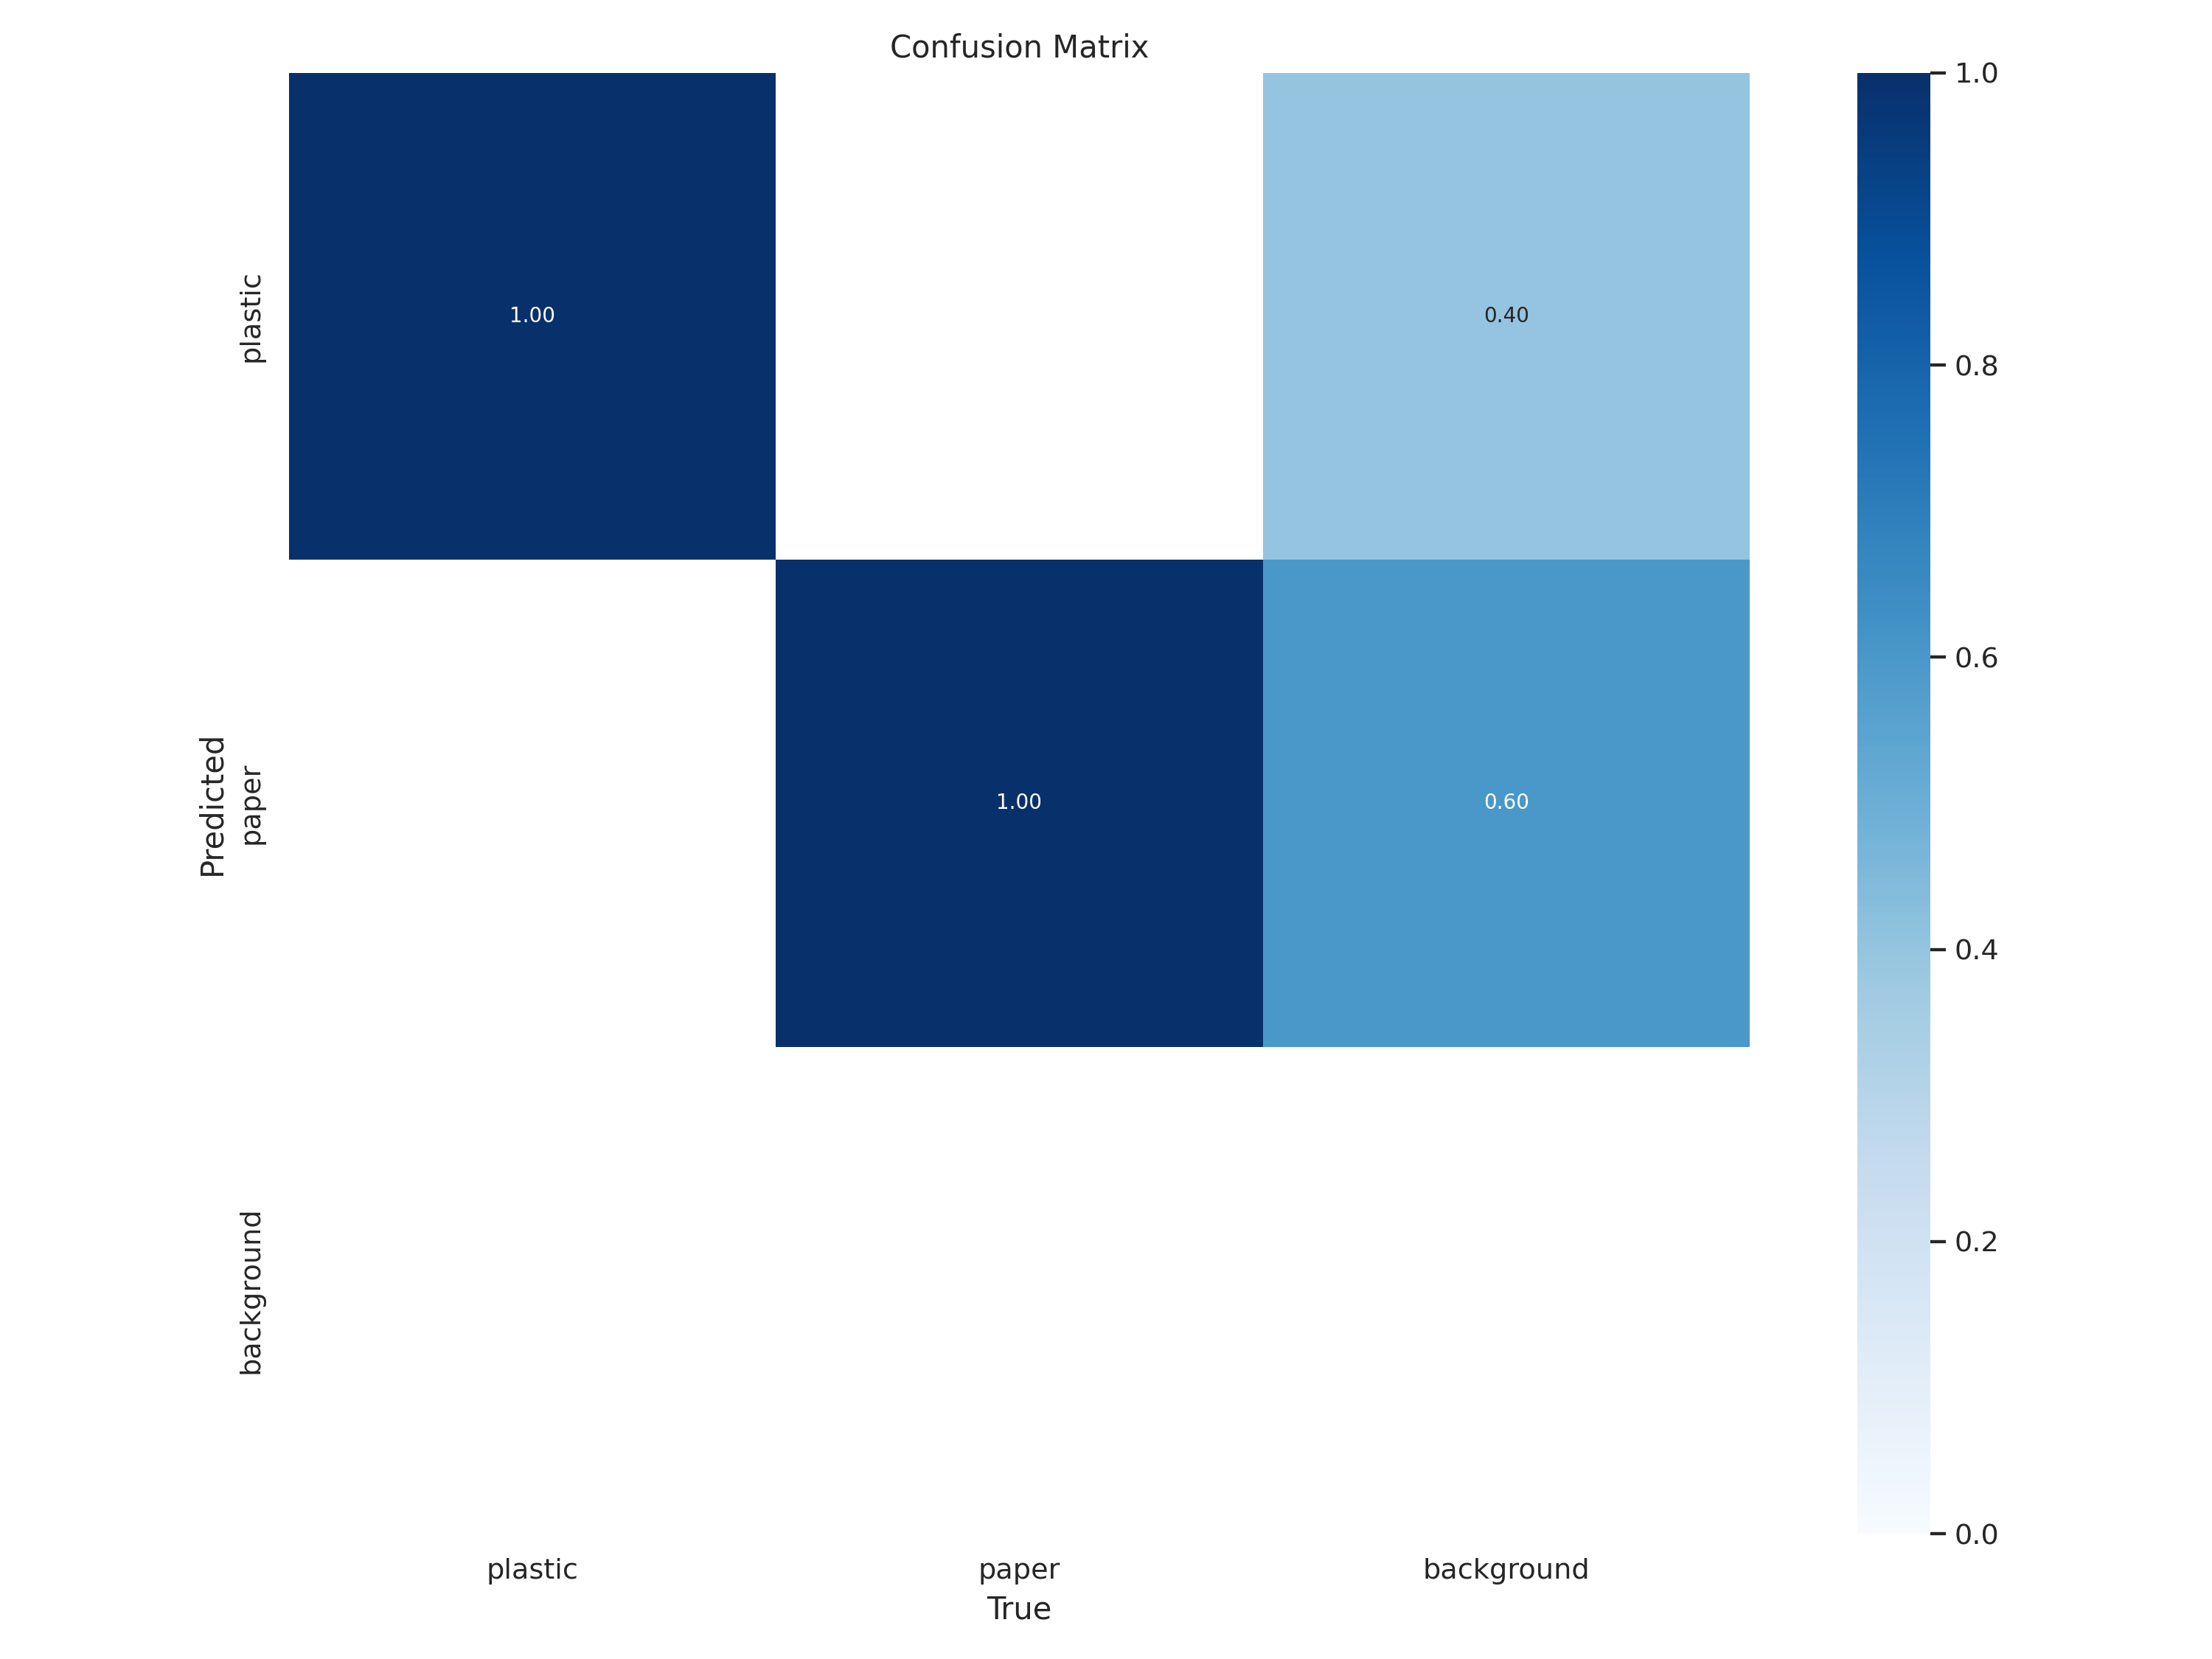

In [ ]:
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

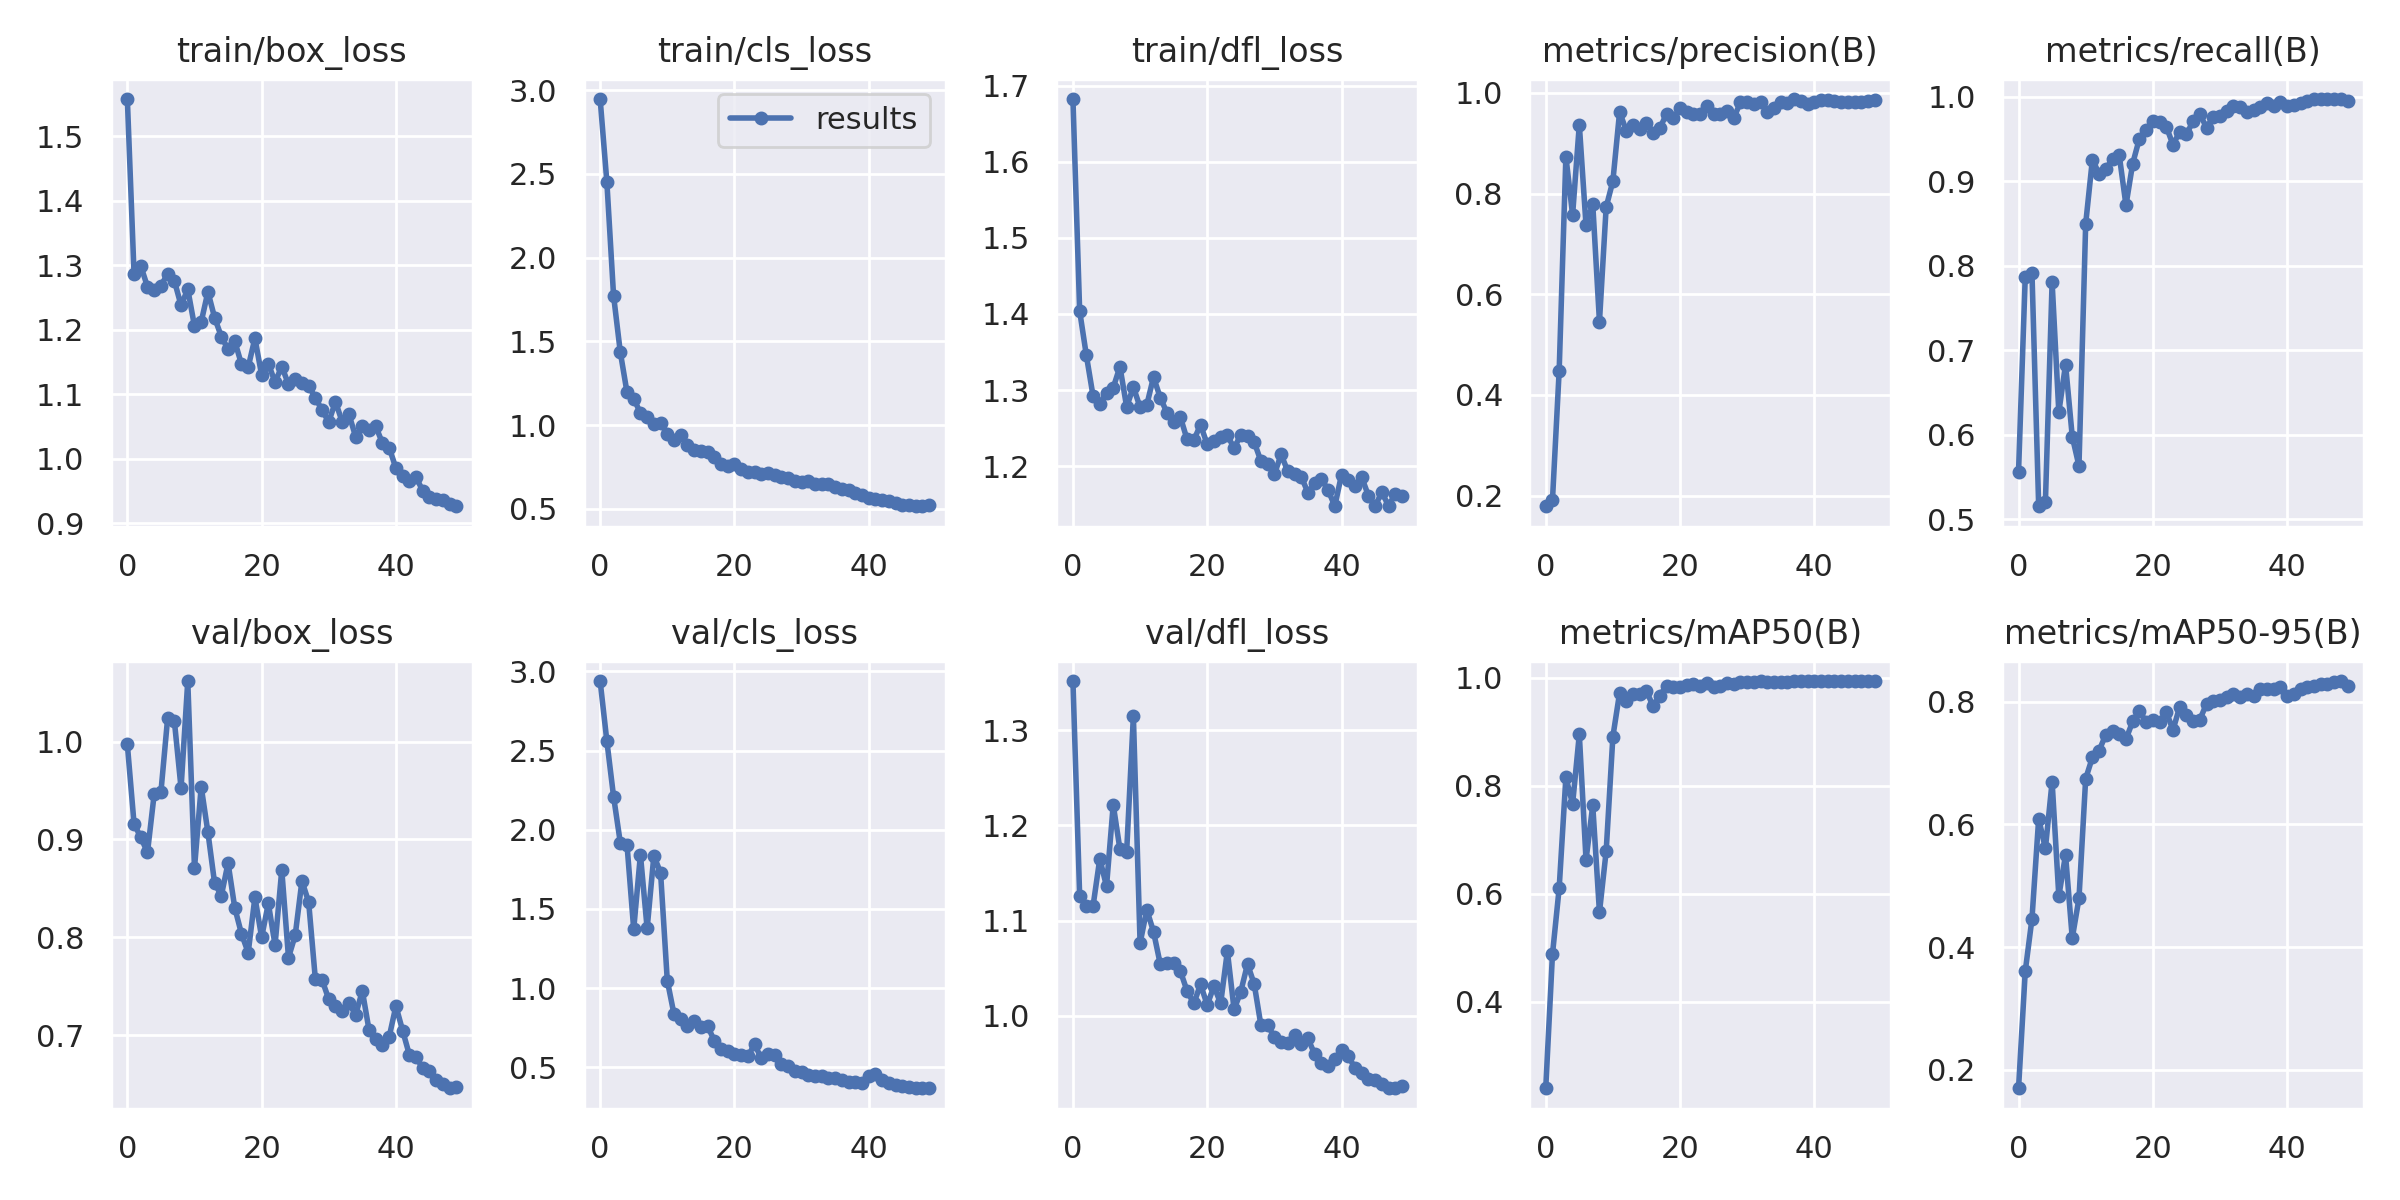

In [ ]:

Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


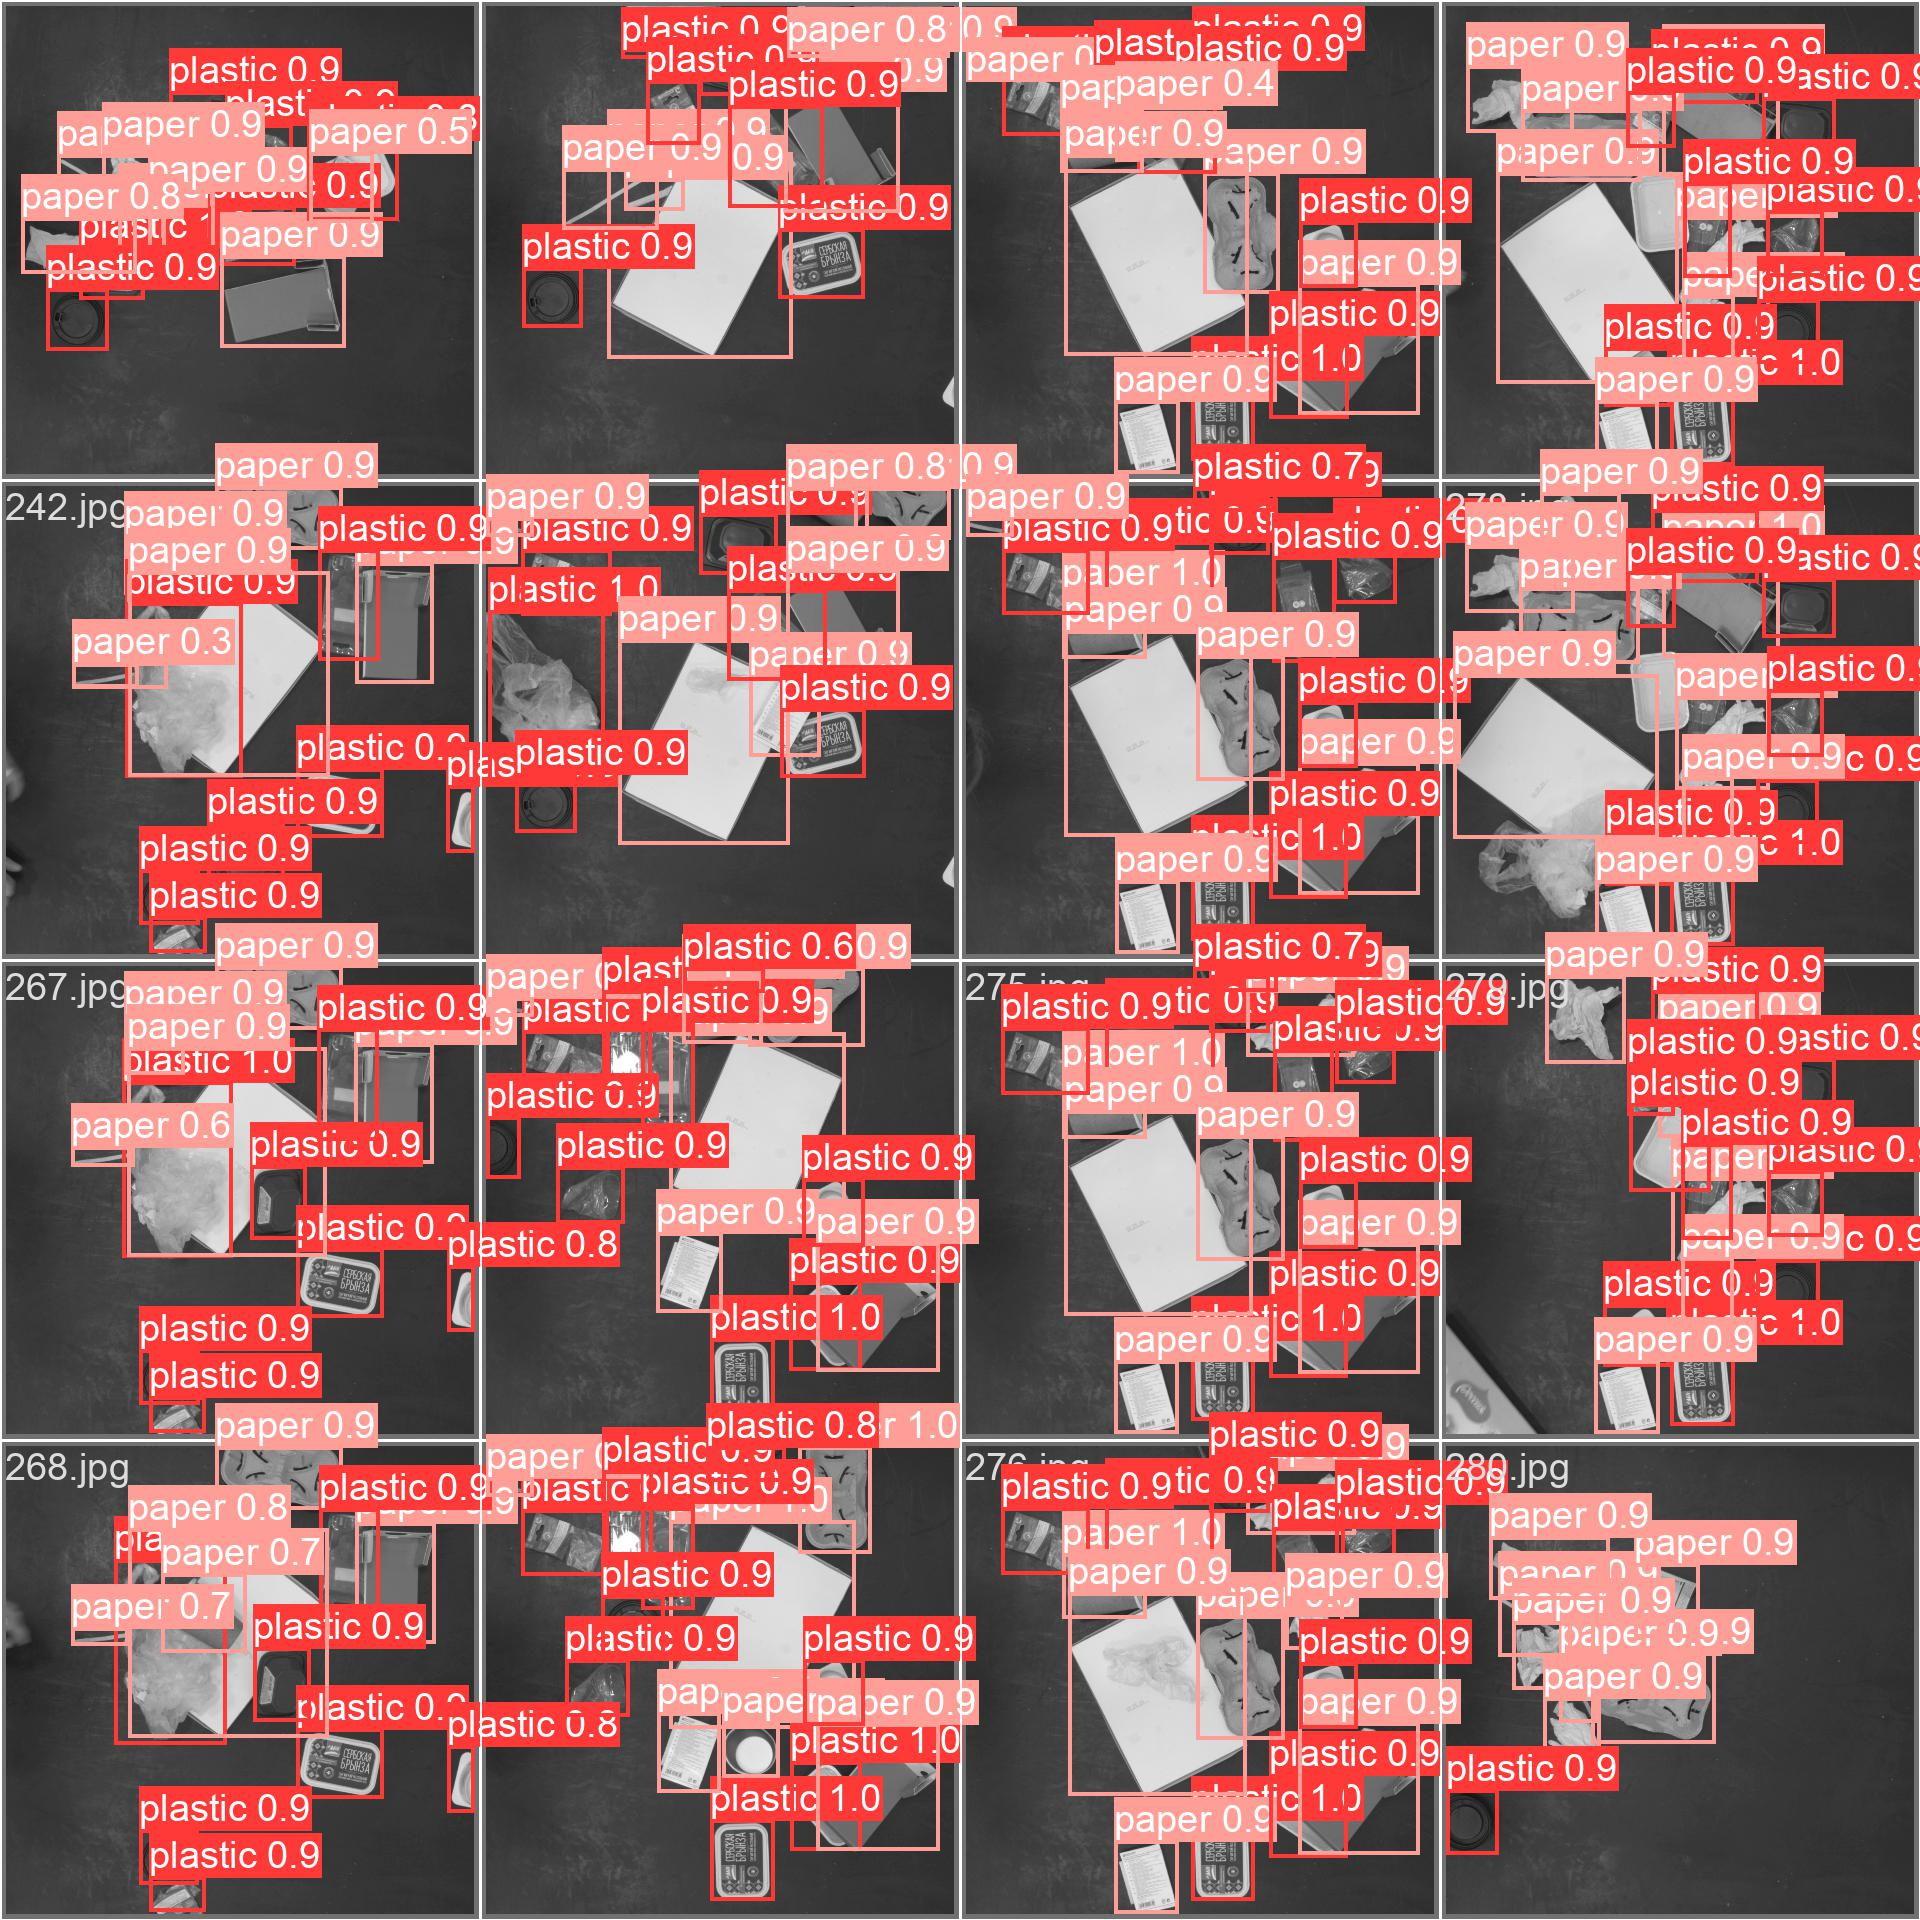

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val  model="/content/drive/MyDrive/colab/yolov8/weights/best_own_dataset.pt" data="/content/drive/MyDrive/colab/yolov8/custom_data.yaml"

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/model.py", line 165, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/validator.py", line 112, in __call__
    self.data = check_det_dataset(self.args.dat

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/colab/yolov8/weights/best_own_dataset.pt" conf=0.25 source="/content/drive/MyDrive/colab/yolov8/custom_dataset/test/images/" save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
Exception in thread Thread-1:
Traceback (most recent call last):
  File "/usr/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.9/dist-packages/sentry_sdk/integrations/threading.py", line 69, in run
    reraise(*_capture_exception())
  File "/usr/local/lib/python3.9/dist-packages/sentry_sdk/_compat.py", line 60, in reraise
    raise value
  File "/usr/local/lib/python3.9/dist-packages/sentry_sdk/integrations/threading.py", line 67, in run
    return old_run_func(self, *a, **kw)
  File "/usr/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/hub/utils.py", line 116, in func
    m = r.json().get('message', 'No JSON message.')
  File "/usr/local/lib/python3.9/dist-packages/

**NOTE:** Let's take a look at few results.

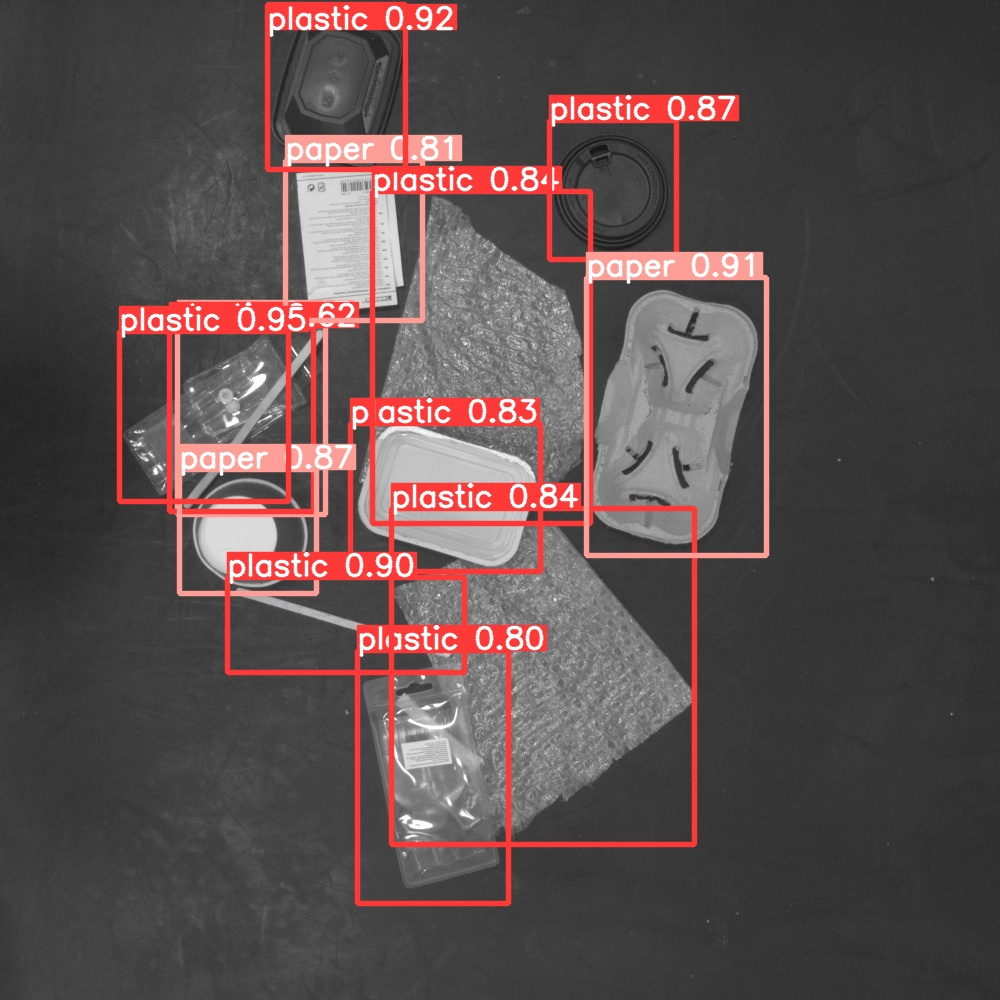

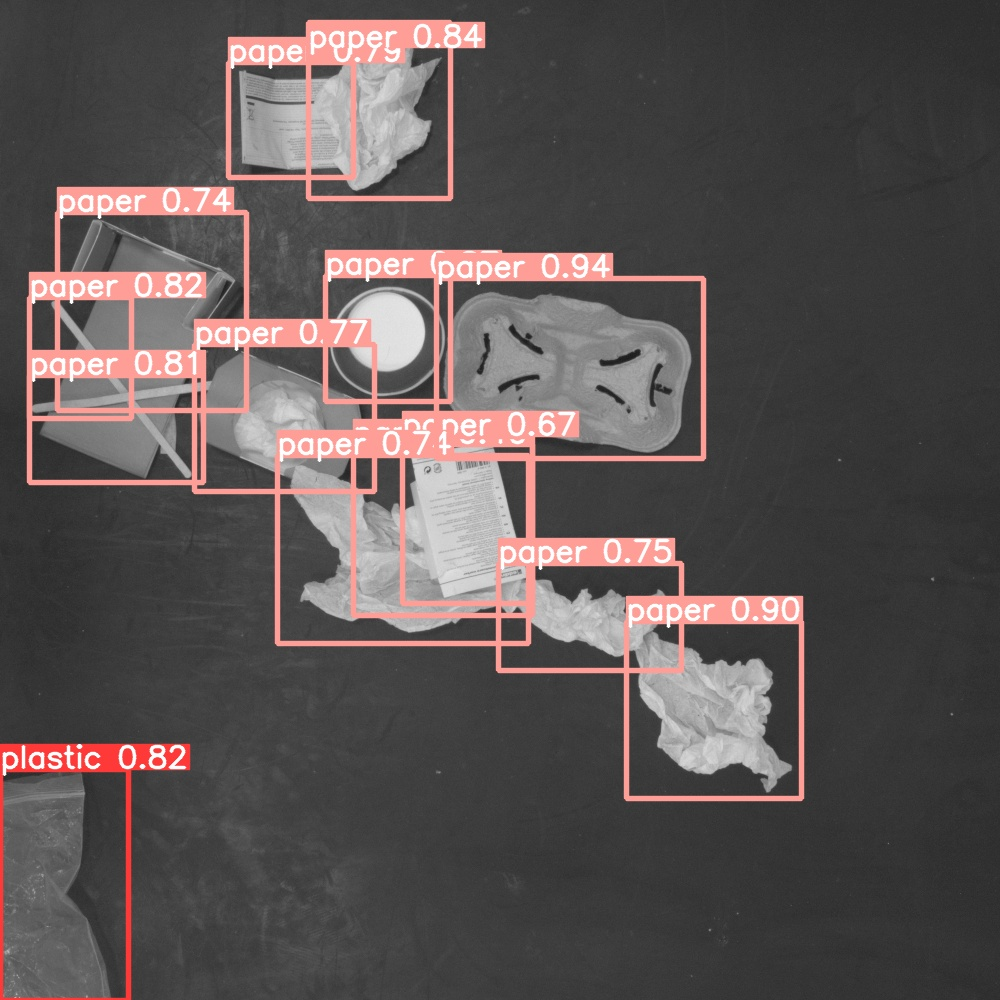

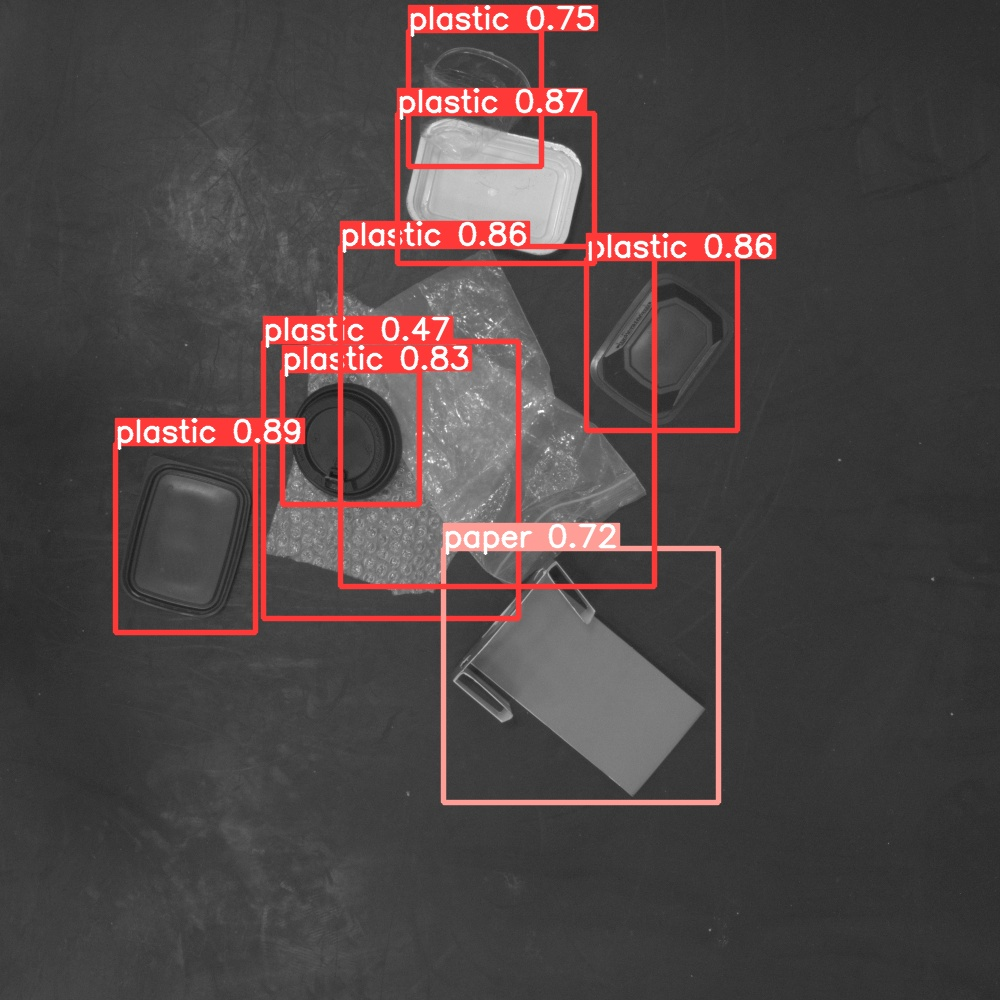

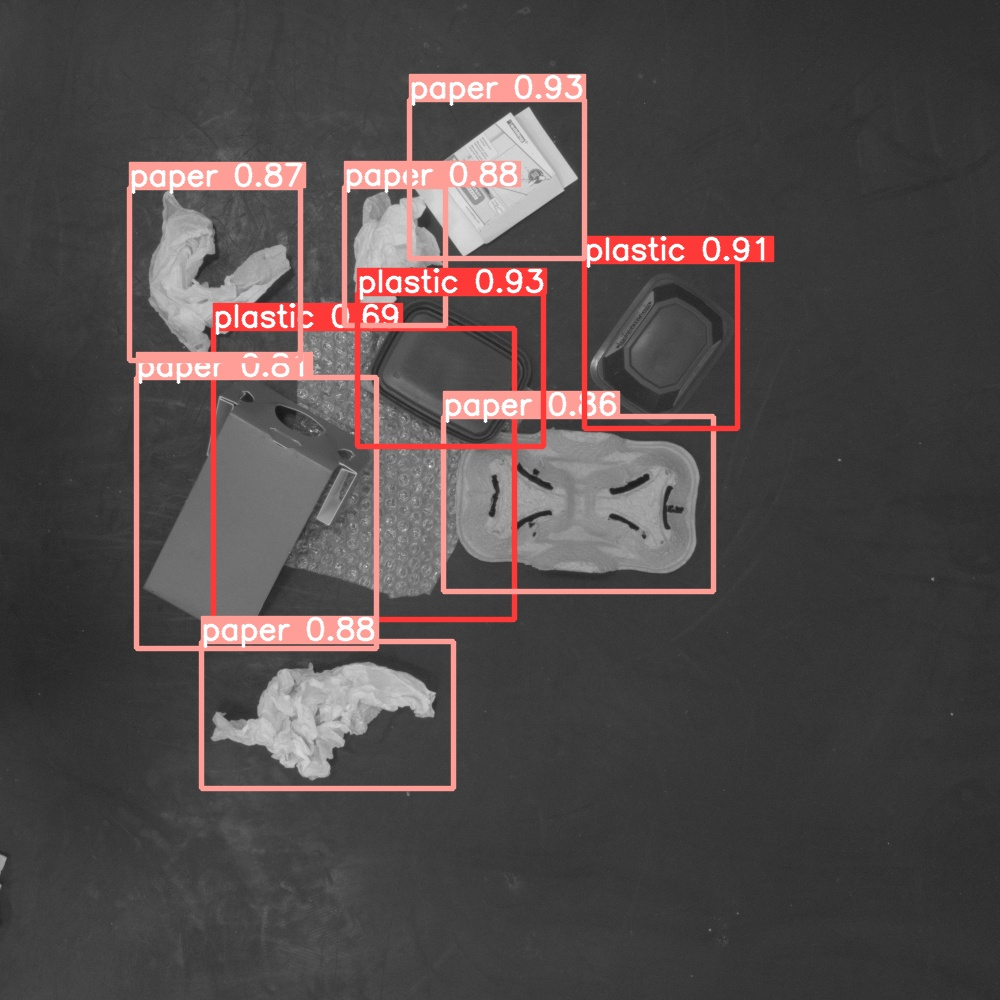

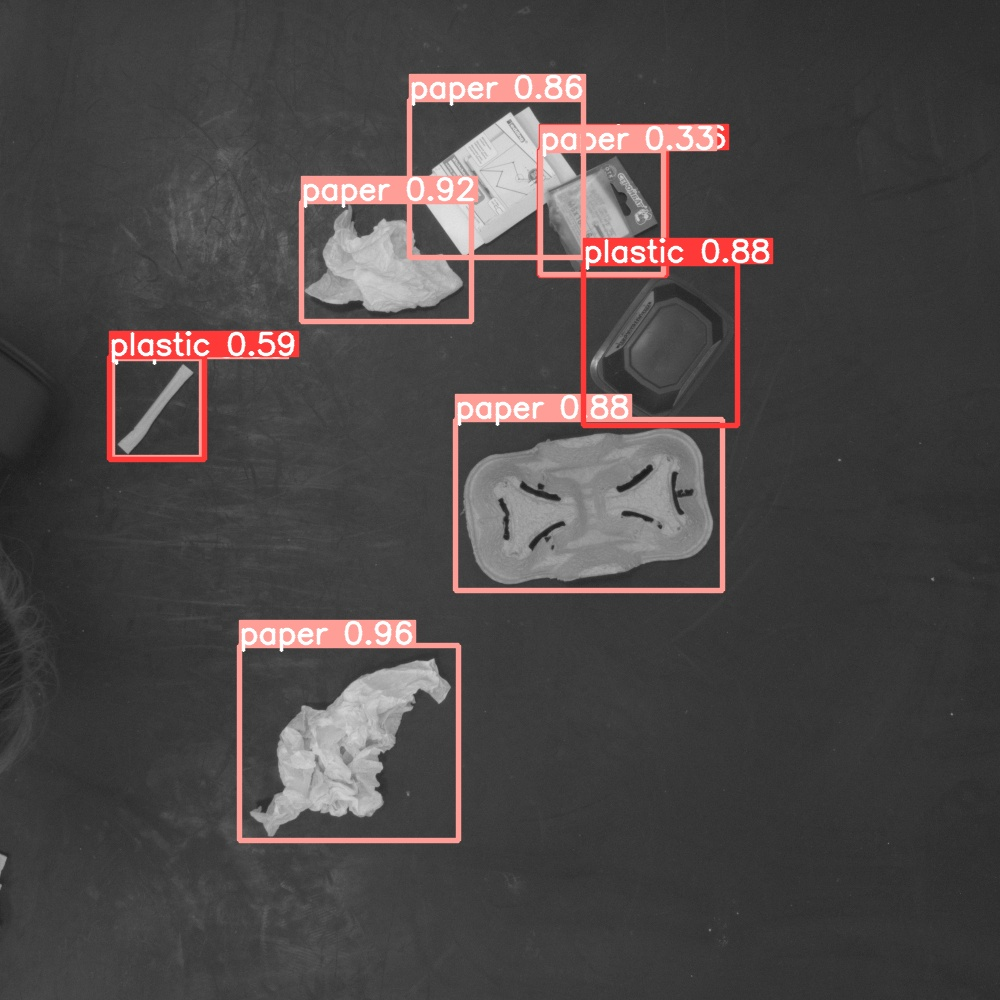

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

**Download predict images and other data**

In [ ]:
import shutil
shutil.make_archive('/mydrive/colab/yolov8/predict' , 'zip', '/content/runs/detect/predict')

'/mydrive/colab/yolov8/sample_data.zip.zip'

In [ ]:
shutil.make_archive('/mydrive/colab/yolov8/train4' , 'zip', '/content/runs/detect/train4')
shutil.make_archive('/mydrive/colab/yolov8/val' , 'zip', '/content/runs/detect/val')

'/mydrive/colab/yolov8/val.zip'

In [ ]:
yolo task=detect mode=predict model=yolov8n.pt source='input/video_3.mp4' show=True

In [ ]:
camera = cv2.VideoCapture(0)

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/colab/yolov8/weights/best_own_dataset.pt" conf=0.25 source=0 save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.9/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [ ]:
from ultralytics import YOLO
from ultralytics.yolo.v8.detect.predict import Detection
import cv2

ImportError: ignored

In [ ]:
model= YOLO("/content/drive/MyDrive/colab/yolov8/weights/best_own_dataset.pt")

In [ ]:
model.predict(source=0, show=True, conf=0.25)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
cap = cv2.VideoCapture(0)
model = YOLO("/content/drive/MyDrive/colab/yolov8/weights/best_own_dataset.pt")
# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict(source= cap )
# results = model.predict(source="folder", show=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


AssertionError: ignored

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.9/dist-packages/sentry_sdk/integrations/threading.py", line 69, in run
    reraise(*_capture_exception())
  File "/usr/local/lib/python3.9/dist-packages/sentry_sdk/_compat.py", line 60, in reraise
    raise value
  File "/usr/local/lib/python3.9/dist-packages/sentry_sdk/integrations/threading.py", line 67, in run
    return old_run_func(self, *a, **kw)
  File "/usr/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/hub/utils.py", line 116, in func
    m = r.json().get('message', 'No JSON message.')
  File "/usr/local/lib/python3.9/dist-packages/requests/models.py", line 900, in json
    return complexjson.loads(self.text, **kwargs)
  File "/usr/lib/python3.9/json/__init__.py", line 346, in loads
    return 